# Live match win probability using Machine Learning


![](./images/win_prb.jpeg)

## Problem Statement

#### Here we are going to build a win predictor model. This will be able to display the probability of the chasing team, changing after every over while the chasing team is batting

`Dataset`: https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set


### Import the required libraries

In [4]:
##importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Further required librarieswill be imported along the development of the project.0

## Read the data

In [5]:
##loading the csv files into dataframes
match_df = pd.read_csv("./ipl_data/matches.csv")
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Let's now get a overview about the data set at hand.

In [6]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
match_df.shape

(756, 18)

In [8]:
dlvr_df = pd.read_csv("./ipl_data/deliveries.csv")
dlvr_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Total score in every inning in every match

In [10]:
inn_score = dlvr_df.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
inn_score

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


But to know the target run, we need only the first inning score. So, we are going to filter out the second inning score. So the total runs column in the table below is the target score.

In [11]:
##first inning score
inn_score = inn_score[inn_score['inning'] == 1]
inn_score

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


Thus if we can merge the above data frame, we will get to know all the information about the matches. The batting team, bowling team along with the scores per match also.

In [12]:
match_df = match_df.merge(inn_score[['match_id', 'total_runs']], left_on='id', right_on='match_id')
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


## Clean up the dataframe

In [13]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Now, "Decan Chargers" and "Sunrisers Hyderabad" are both the same team. Again, "Delhi Daredevils" and "Delhi Capitals" are both the same team. So, we need to clean the data frame and get rid of the same names which appeared twice.

In [14]:
## removing duplicates

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

## Keeping data for only existing teams

Now again there are so many teams which are not active anymore. So we also need to get rid of those names.

In [15]:
teams = [
    'Chennai Super Kings',
    'Delhi Capitals',
    'Mumbai Indians',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad'
]

In [16]:
## using isin method to retain rows that are in the list above
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [17]:
match_df.shape

(641, 20)

## Getting rid of DLS applied matches

Now, there is a mathematical formula to decide scores, called, DLS method ( Duckworth-Lewis-Stern Method ).The DLS method is a mathematical formulation designed to calculate the target score for the team batting second in a limited overs cricket match interrupted by weather or other circumstances.<br>
It is generally accepted to be the most accurate method of setting a target score.<br>
To keep the generalisation intact, we are going to get rid of DLS applied matches.

Let's check first the total number of DLS applies matches

In [18]:
match_df['dl_applied'].value_counts() # it will give us the exact number o matches where DLS was applied and where not

0    626
1     15
Name: dl_applied, dtype: int64

In [19]:
match_df = match_df[match_df['dl_applied'] == 0]
match_df.shape

(626, 20)

So, our data finally reduced to 626 records with 20 features. Now we need to redundant features also.

## Get rid of redundant cols

In [20]:
match_df = match_df[['match_id','city','winner','total_runs']]
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


## Match status in the 2nd innings

Now to get the more detailed info about the matches in match_df, let's first merge match df with the dlvr data frame and analyze the table.

In [21]:
dlvr_df = match_df.merge(dlvr_df, on='match_id')
dlvr_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [22]:
dlvr_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

Here, among the features we can see the total runs_x and also total_runs_y. Now total_runs_x came from the first table called matches_df and total_runs_y came from the second table dlvr_df. So, total_runs_x basically represent the target runs and total_runs|_y denotes the total run on that particular ball.

Now, after we have got the target runs to chase, now we dont need the 1st innings info anymore, the second innings have started. So, we are gonna filter out all the informaion about the 1st innings value and focus on the 2nd innings only.

In [23]:
dlvr_df = dlvr_df[dlvr_df['inning'] == 2]
dlvr_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


# Adding Required Feature :

## 'Current Scores'

total_runs_y was denoting the runs scored at particular balls, so to get the total runs score till that ball, we need to sum cumulatively 

In [24]:
## score upto that delivery
dlvr_df['current_score'] = dlvr_df.groupby('match_id').cumsum()["total_runs_y"]
dlvr_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7


## 'runs_left'

Now, we are gonna add another feature 'runs_left' which will denote, as the name suggest, the total runs left to win equate run with the opposite team

In [25]:
## runs left to score

dlvr_df['runs_left'] = dlvr_df['total_runs_x'] - dlvr_df['current_score']
dlvr_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200


## 'balls_left'

Now we will try to add a feature called, 'balls_left' which will denote the number of total balls left for the match to be completed.<br>
Now, to do that, we basically need to determine the total number of balls bowled till now, then subtract that from 120 ie. the total number of balls of a T20 match. To get the total number of balls bowled already, we need to calculate the number of over done multiplied by 6 and the number of current ball added to that number.

In [26]:
## balls left
dlvr_df['balls_left'] = 120 - ((dlvr_df['over']-1)*6 + dlvr_df['ball'])  ## Here, the first over is denoted as over 0 ir he balls of the first over are, 0.1st, 0.2nd, 0.3rd, like these...so we used dlvr_df['over']-1 as the over number
dlvr_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115


## 'wickets_left'

Now, let's look at the player dismissed feature, whenever a particular player is dismissed the name is popped up here. 

In [27]:
dlvr_df['player_dismissed'].isnull

<bound method Series.isnull of 125             NaN
126             NaN
127             NaN
128             NaN
129             NaN
            ...    
149573          NaN
149574          NaN
149575    SR Watson
149576          NaN
149577    SN Thakur
Name: player_dismissed, Length: 72413, dtype: object>

So, we saw that whenver a player dismissed a plyer is popped up in the column, but whenever NOT, NaN is being printed. So we will fill the NaN records with 0 and fill the records with a particular names, with 1.

In [28]:
dlvr_df['player_dismissed'] = dlvr_df['player_dismissed'].fillna("0")       ## filling the NaN records with 0.
dlvr_df['player_dismissed'] = dlvr_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")        ## filling  the records with 1 whenever the value at that cell is Not 0.
dlvr_df['player_dismissed'] = dlvr_df['player_dismissed'].astype('int')     ## convert the column into type integer
dlvr_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,0,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,0,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,0,NaN,NaN,7,200,115


Thsum if we wanna calculate the wickets lost at a particular ball, we basucally have to cumsum over the player dismissed integers,

In [29]:
wkts = dlvr_df.groupby('match_id').cumsum()['player_dismissed']
wkts

125       0
126       0
127       0
128       0
129       0
         ..
149573    5
149574    5
149575    6
149576    6
149577    7
Name: player_dismissed, Length: 72413, dtype: int32

In [30]:
dlvr_df['wickets'] = 10 - wkts  ## as wkts is basically an array, so we can simply subtract elements from 10.
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4


## 'Current run rate'

In [31]:
dlvr_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left', 'wickets'],
      dtype='object')

current run rate is basically total runs upon overs that have completed so far. As, we dont have the over numbers available, so we will calculate the over number from the balls left

In [32]:
## calculating current run rate = runs/overs
dlvr_df['crr'] = (dlvr_df['current_score']*6) / (120 - dlvr_df['balls_left'])
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,206,119,10,6.000000
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,118,10,3.000000
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,117,10,2.000000
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,204,116,10,4.500000
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,200,115,10,8.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,NaN,NaN,152,0,4,5,7.862069
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,NaN,NaN,154,-2,3,5,7.897436
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,1,run out,KH Pandya,155,-3,2,4,7.881356
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,NaN,NaN,157,-5,1,4,7.915966


## 'Required runrate'
Required run rate is basically, required runs value divided by number of overs lefts 

In [33]:
##required run rate  = runs left / overs left
dlvr_df['rrr'] = (dlvr_df['runs_left']*6) / dlvr_df['balls_left']
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,0,4,5,7.862069,0.000000
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000


## Did the team won or not?


ie. we need to find, did the team that batted second ie. in the 2nd innings or the chasing team win the match or not. 

In [34]:
def match_result(row):
    return 1 if row['batting_team'] == row['winner'] else 0


dlvr_df['result'] = dlvr_df.apply(match_result, axis=1)  ## axis = 1 means that the the function result is being applied along the columns.
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,5,7.862069,0.000000,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0


# Cleaning Up the Final DataFrame

In [35]:
dlvr_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left', 'wickets', 'crr', 'rrr', 'result'],
      dtype='object')

In [36]:
final_df = dlvr_df[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
149574,11415,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
149575,11415,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
149576,11415,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,4,152,7.915966,-30.000000,0


But still we have some records as 'inf' and zeroes. This happens due to the cases when balls left is 0 and its  dividing the total runs left. So, we are gonna get rid off all the null values and the records where balls left is 0

In [37]:
final_df.dropna(inplace = True)
final_df = final_df[ final_df.balls_left != 0 ]
final_df

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...
149572,11415,Chennai Super Kings,Mumbai Indians,Hyderabad,1,5,5,152,7.878261,1.200000,0
149573,11415,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
149574,11415,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
149575,11415,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0


Thus after all the Data Cleaningm the dataframe is ready for being fed into machine learningmodel to train.<br>
But first we need to extract the target variable ie the result feature from the whole dataframe and then we need to split the total records for training and testing purposes.

# Segregating Features from Target Variables

In [38]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[: , -1]
X

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
125,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555
126,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576
127,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103
128,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724
129,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...
149572,11415,Chennai Super Kings,Mumbai Indians,Hyderabad,1,5,5,152,7.878261,1.200000
149573,11415,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000
149574,11415,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000
149575,11415,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000


In [39]:
y

125       0
126       0
127       0
128       0
129       0
         ..
149572    0
149573    0
149574    0
149575    0
149576    0
Name: result, Length: 71342, dtype: int64

# Training and Testing Splitting

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
X_train.shape

(57073, 10)

In [41]:
X_test.shape

(14269, 10)

# <B>MODEL DEVELOPMENT AND DEPLOYMENT</B>

# Which model to choose ?

Our target variables are basically just 0s and 1s, so its basically a binary classification problem under the section of Supervised Machine Learning. There will be just two classes '1' or '0' or so to speak, 'winner' or 'looser'. So, for binary classification problem, we will use a machine learning algorithm called logistic regression.And as we know the function for logistic regression, is the Sigmoid fucntion --> (1/(1+exp(-x)))<br>
This function is going to give the expression of probability which will be between 0 and 1. From this expression we will be able to display realtime match winning probability.

# Converting into Categorical Data

Few of our features contain strings as the records. These are classfied as Categorcal Data. But the machine cant understand strings so we need to convert it into Encoded Data. There are three types of categorical data, <b>Nominal Values</b>, <b>Ordinal Values</b>, <b>Binary Values</b>. <br>
<B>NOMINAL VALUES :</B> Examples are random strings which dies not contain any sort of ordering.<br>
<B>ORDINAL VALUES :</B> Here ordering exists. Examples are rating system. Like Zomato wants to rate a particular res 1 star, 2 stars or 3 stars like that. <br>
<b>BINARY VALUES :</B> Simply for cases where there's only two classes, only 0 and 1 are there. So, ordering is also here.

So, here we have nominal type of categorical data at hand. For nominal Values, we use <b>ONE-HOT-CODING</B>. For, each classes we will get each columns.<br>
For, Ordinal Data, we use Label Encoding.

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

list_to_encode = ['batting_team', 'bowling_team','city']
col_trf = ColumnTransformer([
                            ('col_trf', OneHotEncoder(sparse = False, drop = 'first'), list_to_encode)
                            ],
                            remainder = 'passthrough'
                            )
                            

# Model Pipeline

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model_pipe = Pipeline(steps = [
                            ('step1',col_trf),
                            ('step2',LogisticRegression(solver='liblinear'))
])

# Training

In [44]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [45]:
y_predict = model_pipe.predict(X_test)
y_predict

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

Thus we got all the predictions using the test data in a form of arrray.

# Model Accuracy

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8062232812390497

# Probability Calculation

In [47]:
X_test.head()

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
37607,192,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,133,76,9,171,5.181818,10.500000
659,7,Mumbai Indians,Kolkata Knight Riders,Mumbai,134,89,10,178,8.516129,9.033708
99524,512,Kings XI Punjab,Delhi Daredevils,Chandigarh,11,45,8,115,8.320000,1.466667
45166,223,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,26,53,7,130,9.313433,2.943396
30058,161,Kings XI Punjab,Delhi Daredevils,Bloemfontein,85,89,8,120,6.774194,5.730337


Lets check the probability that the chasing team in 10th column will wint he match or not.

In [48]:
model_pipe.predict_proba(X_test)[10]

array([0.58870365, 0.41129635])

In [49]:
model_pipe.classes_

array([0, 1], dtype=int64)

So, there is actually, 59.9 percent chance that the chasing team would win the match.

# Display and Calculate all the probability for all the match data

In [50]:
def win_prob_calc(match_data, match_id, model):
    """
    At every delivery, the model will calculate the probability
    for the chasing team.
    """
    
    match = match_data[match_data['match_id'] == match_id]
    
    ## Match between teams
    print(f"Match: {match['batting_team'].iloc[0]} vs {match['bowling_team'].iloc[0]}")
    
    # converting ball by ball data to over by over data
    match = match[(match['ball'] == 6)]
    
    # get all the required columns in a copy dataframe
    copy_df = match[['match_id','batting_team','bowling_team','city','runs_left',\
                     'balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    
    # get rows where balls left are not zero - avoiding division by zero error
    copy_df = copy_df[copy_df['balls_left'] != 0]
    
    # calculate probability using the model
    result = model.predict_proba(copy_df)
    
    ## calculating percentage chance(prob multiplied by 100) for each team
    copy_df['loss'] = np.round(result.T[0]*100,1)
    copy_df['win'] = np.round(result.T[1]*100,1)
    
    # end of over 
    copy_df['end_of_over'] = range(1, copy_df.shape[0]+1)
    
    
    target = copy_df['total_runs_x'].values[0]
    print("Target:", target)
    
    # calculate runs left
    runs = list(copy_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    
    copy_df['runs_in_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    wickets = list(copy_df['wickets'].values)
    
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    
    # 
    w = np.array(wickets)
    nw = np.array(new_wickets)
    
    copy_df['wickets_in_over'] = (nw - w)[0:copy_df.shape[0]]
    
    copy_df = copy_df[['end_of_over','runs_in_over','wickets_in_over','loss','win']]
    
    # chasing team win probability
    print(f"Win probability for {match['batting_team'].iloc[0]}")
    
    return copy_df, target

In [51]:
out_df, target = win_prob_calc(dlvr_df, 80, model_pipe)
out_df

Match: Royal Challengers Bangalore vs Deccan Chargers
Target: 165
Win probability for Royal Challengers Bangalore


,end_of_over,runs_in_over,wickets_in_over,loss,win
11927,1,10,0,28.8,71.2
11933,2,6,0,28.8,71.2
11939,3,8,1,38.9,61.1
11945,4,6,0,37.9,62.1
11951,5,6,0,36.7,63.3
11957,6,7,0,34.1,65.9
11963,7,3,1,52.7,47.3
11969,8,7,0,49.8,50.2
11975,9,5,0,50.1,49.9
11981,10,3,0,53.6,46.4


# Plotting the Probabilities with Runs

Text(0.5, 1.0, 'Target-165')

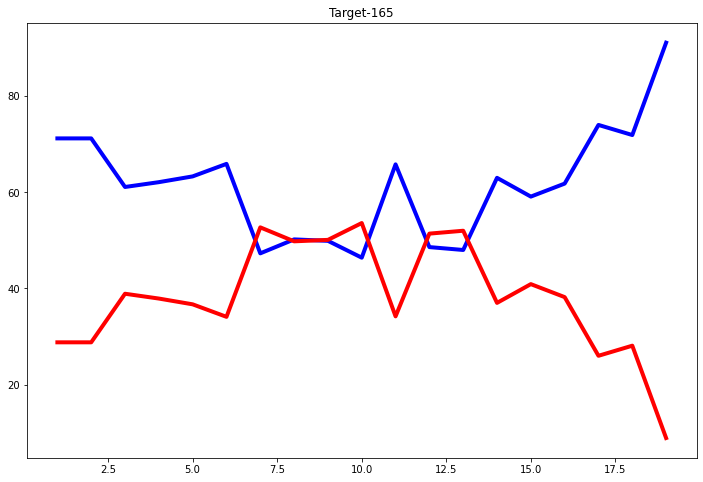

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

## plot win probabilities
plt.plot(out_df['end_of_over'],out_df['win'],color='blue',linewidth=4)

## plot losing probabilities
plt.plot(out_df['end_of_over'],out_df['loss'],color='red',linewidth=4)

# plt.bar(temp_df['end_of_over'],temp_df['runs_in_over'])
plt.title('Target-' + str(target))

In [53]:
out_df.set_index('end_of_over', inplace = True)
out_df_barchart = out_df.loc[:,['win','loss']]
 #out_df_barchart = out_df_barchart.cumsum(axis = 0)
out_df_barchart

,win,loss
end_of_over,,
1,71.2,28.8
2,71.2,28.8
3,61.1,38.9
4,62.1,37.9
5,63.3,36.7
6,65.9,34.1
7,47.3,52.7
8,50.2,49.8
9,49.9,50.1


In [54]:
import bar_chart_race as bcr
bcr.__version__

'0.1.0'

In [55]:
bcr.bar_chart_race(df = out_df_barchart , title= 'Probability for the team to Win or Loose', figsize = (4.5,3))

Thus we can easily visualize how the probability is changing after every over.